# TP5

1. En un pequeño hotel, los empleados encargados de la cocina quieren preparar el desayuno de los huéspedes del fin de semana. Ellos dividen el trabajo, con la preparación de un artículo por empleado. Se presenta la secuencia de las actividades con la ruta de acceso que representan las tareas para una persona de la siguiente manera:

    a) Especifique el modelo y su objetivo, describiendo entradas, salidas, actividades, eventos y clasificación del modelo.

   Objetivo: Encontrar la secuencia de actividades criticas para la preparación del desayuno de los huespedes para evitar demoras.

   Entradas: tiempo min y max de cada tarea, dependencia entre actividades.

   Salidas: secuencia de actividades criticas.

   Actividades: A, B, C, D, E, F, G.

   Eventos: Inicio de tarea, fin de tarea.

   Clasificacion: discreto, dinamico, estocastico, matematico y formal.
    
    b) 	![Diagrama](a.png)
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CORRIDAS = 100
EXPERIMENTOS = 30

In [3]:
def simulacionHotel():
    contadores = {
        'inferior': [],
        'medio': [],
        'superior': [],
        'promedioExperimento': [],
        'total':[]
    }

    for e in range(EXPERIMENTOS):
        totalExperimento = []
        for c in range(CORRIDAS):
            tareaA = int(np.random.uniform(2, 4))
            tareaB = int(np.random.uniform(3, 6))
            tareaC = int(np.random.uniform(2, 5))
            tareaD = int(np.random.uniform(3, 6))
            tareaE = int(np.random.uniform(2, 5))
            tareaF = int(np.random.uniform(4, 8))
            tareaG = int(np.random.uniform(3, 7))
            
            accesoSuperior = tareaA + tareaB + tareaC
            accesoMedio = tareaD + tareaE
            accesoInferior = tareaF + tareaG

            contadores['superior'].append(accesoSuperior)
            contadores['medio'].append(accesoMedio)
            contadores['inferior'].append(accesoInferior)

            totalCorrida = accesoSuperior + accesoMedio + accesoInferior
            totalExperimento.append(totalCorrida)
            contadores['total'].append(totalCorrida)

        promedioExperimento = np.mean(totalExperimento)
        contadores['promedioExperimento'].append(promedioExperimento)
       
    return contadores

In [4]:
# La funcion calcual el intervalo de confianza teniendo en cuenta
# El valor del desvio, y el valor de z
# Retorno el limite inferior y superior en una tupla
def calc_intervalo_confianza(muestra, desvio, z):
    n = len(muestra)
    media = np.array(muestra).mean()
    error_estandar = desvio/np.sqrt(n)
    limite_superior = media + z*error_estandar
    limite_inferior = media - z*error_estandar
    return (limite_inferior, limite_superior)

c. 1. El tiempo promedio de finalización del proyecto y el IC. Con el 99% de confiabilidad (2,57).

In [5]:
Z = 2.57
contadores = simulacionHotel()
promedioProyecto = np.mean(contadores['total'])
li, ls = calc_intervalo_confianza(contadores['total'], np.std(contadores['total']), Z) 
print(f'Tiempo promedio de finalizacion del proyecto: {int(promedioProyecto)}')
print(f'Intervalo de confianza: {li:.2f} - {ls:.2f}')

Tiempo promedio de finalizacion del proyecto: 26
Intervalo de confianza: 26.44 - 26.66


2. Calcule el porcentaje de criticidad tienen los diferentes accesos. En el caso del ejercicio 3, evalúe el porcentaje de criticidad de cada tarea.

In [6]:
tiempoTotal = sum(contadores['total'])
tiempoInferior = sum(contadores['inferior'])
tiempoMedio = sum(contadores['medio'])
tiempoSuperior = sum(contadores['superior'])

criticidadInferior = (tiempoInferior/tiempoTotal)*100
criticidadMedio = (tiempoMedio/tiempoTotal)*100
criticidadSuperior = (tiempoSuperior/tiempoTotal)*100

print(f'Porcentaje de criticidad superior: {criticidadSuperior:.2f}%')
print(f'Porcentaje de criticidad medio: {criticidadMedio:.2f}%')
print(f'Porcentaje de criticidad inferior: {criticidadInferior:.2f}%')

Porcentaje de criticidad superior: 35.87%
Porcentaje de criticidad medio: 26.45%
Porcentaje de criticidad inferior: 37.68%


3. Grafique un histograma con la distribución del tiempo de realización del proyecto con los datos de las 3000 corridas. Y otro teniendo en cuenta los promedios de los 30 experimentos.


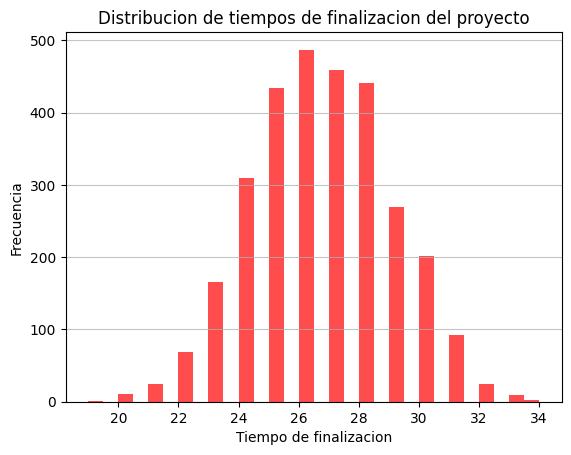

In [7]:
plt.hist(contadores['total'], bins=30, color='red', alpha=0.7)
plt.title('Distribucion de tiempos de finalizacion del proyecto')
plt.xlabel('Tiempo de finalizacion')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

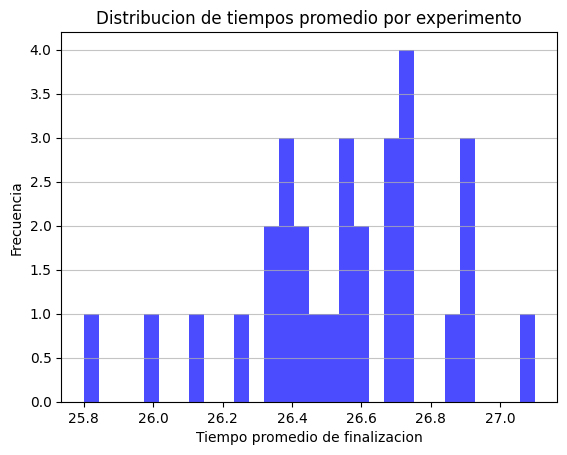

In [8]:
plt.hist(contadores['promedioExperimento'], bins=30, color='blue', alpha=0.7)
plt.title('Distribucion de tiempos promedio por experimento')
plt.xlabel('Tiempo promedio de finalizacion')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

2. Dos operarios de un lavadero de autos se dividen las tareas al momento de comenzar con un nuevo trabajo.

a) Especifique el modelo y su objetivo, describiendo entradas, salidas, actividades, eventos y clasificación del modelo.  
    
Objetivo: Identificar el conjunto de tareas que mas demora tiene en al momento de comenar un nuevo trabajo.

Entradas: tiempo min y max de cada tarea, dependencia entre actividades.

Salidas: secuencia de actividades con demora.

Actividades: A, B, C, D, E, F, G.

Eventos: Inicio de tarea, fin de tarea.

Clasificacion: discreto, dinamico, estocastico, matematico y formal.

![Diagrama](b.png)

In [9]:
def simulacionLavadero():
    contadores = {
        'inferior': [],
        'medio': [],
        'superior': [],
        'promedioExperimento': [],
        'total':[]
    }
    for e in range(EXPERIMENTOS):
        totalExperimento = []
        for c in range(CORRIDAS):
            tareaA = int(np.random.uniform(1, 5))
            tareaB = int(np.random.uniform(1, 3))
            tareaC = int(np.random.uniform(1, 3))

            accesoSuperior = tareaA + tareaB + tareaC

            tareaD = int(np.random.uniform(1, 6))
            tareaE = int(np.random.uniform(6, 12))
            tareaF = int(np.random.uniform(5, 10))

            accesoMedio = tareaA + tareaD + tareaE + tareaF

            tareaG = int(np.random.uniform(10, 15))
            accesoInferior = tareaF + tareaG

            contadores.get('superior').append(accesoSuperior)
            contadores.get('medio').append(accesoMedio)
            contadores.get('inferior').append(accesoInferior)

            totalCorrida = accesoSuperior + accesoMedio + accesoInferior
            totalExperimento.append(totalCorrida)
            contadores.get('total').append(totalCorrida)
        
        promedioExperimento = np.mean(totalExperimento)
        contadores.get('promedioExperimento').append(promedioExperimento)
    
    return contadores

c. Simule 30 experimentos de 100 corridas cada una y calcule:
1. El tiempo promedio de finalización del proyecto y el IC. Con el 99% de confiabilidad (2,57).


In [16]:
contadoresLavadero = simulacionLavadero()
promedioProyecto = np.mean(contadoresLavadero['total'])
li, ls = calc_intervalo_confianza(contadoresLavadero['total'], np.std(contadoresLavadero['total']), Z)
print(f'Tiempo promedio de finalizacion del proyecto: {int(promedioProyecto)}')
print(f'Intervalo de confianza: {li:.2f} - {ls:.2f}')

Tiempo promedio de finalizacion del proyecto: 45
Intervalo de confianza: 45.11 - 45.54


2. Calcule el porcentaje de criticidad tienen los diferentes accesos. En el caso del ejercicio 3, evalúe el porcentaje de criticidad de cada tarea.

In [17]:
tiempoTotal = sum(contadoresLavadero['total'])
tiempoInferior = sum(contadoresLavadero['inferior'])
tiempoMedio = sum(contadoresLavadero['medio'])
tiempoSuperior = sum(contadoresLavadero['superior'])

criticidadInferior = (tiempoInferior/tiempoTotal)*100
criticidadMedio = (tiempoMedio/tiempoTotal)*100
criticidadSuperior = (tiempoSuperior/tiempoTotal)*100

print(f'Porcentaje de criticidad superior: {criticidadSuperior:.2f}%')
print(f'Porcentaje de criticidad medio: {criticidadMedio:.2f}%')
print(f'Porcentaje de criticidad inferior: {criticidadInferior:.2f}%')

Porcentaje de criticidad superior: 12.04%
Porcentaje de criticidad medio: 46.16%
Porcentaje de criticidad inferior: 41.80%


3. Grafique un histograma con la distribución del tiempo de realización del proyecto con los datos de las 3000 corridas. Y otro teniendo en cuenta los promedios de los 30 experimentos.

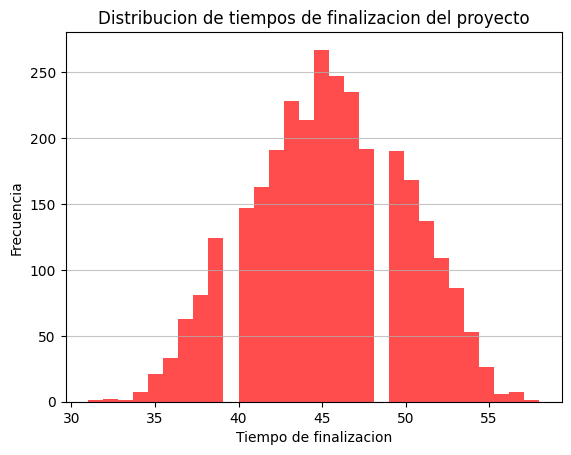

In [19]:
plt.hist(contadoresLavadero['total'], bins=30, color='red', alpha=0.7)
plt.title('Distribucion de tiempos de finalizacion del proyecto')
plt.xlabel('Tiempo de finalizacion')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

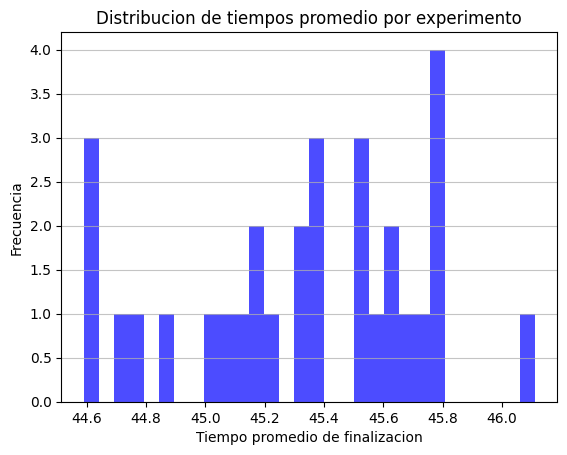

In [20]:
plt.hist(contadoresLavadero['promedioExperimento'], bins=30, color='blue', alpha=0.7)
plt.title('Distribucion de tiempos promedio por experimento')
plt.xlabel('Tiempo promedio de finalizacion')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

3. Una empresa constructora quiere comenzar a construir una casa en un lote determinado, con 2 habitaciones, 2 baños, una cocina/comedor, una sala de estar y un garage. 
Sabiendo que el capital humano está disponible y que los límites del terreno ya fueron marcados, ellos determinan que deben realizar las siguientes tareas:

a. Objetivo: Simular la construccion de una casa con el fin de conocer la duracion estimada del proyecto y la identificacion de tareas criticas.

Entradas: tiempo min y max de cada tarea, dependencia entre actividades.

Salidas: duracion estimada del proyecto.

Actividades: A, B, C, D, E, F, G, H, I, J.

Eventos: Inicio de tarea, fin de tarea.

Clasificacion: discreto, dinamico, estocastico, matematico y formal.

b. ![Diagrama](c.png)

In [21]:
def simulacionConstruccion():
    contadores = {
        'tareaA': [],
        'tareaB': [],
        'tareaC': [],
        'tareaD': [],
        'tareaE': [],
        'tareaF': [],
        'tareaG': [],
        'tareaH': [],
        'tareaI': [],
        'tareaJ': [],
        'total': [],
        'promedioExperimento': []
    }

    for e in range(EXPERIMENTOS):
        totalExperimento = []
        for c in range(CORRIDAS):
            tareaA = int(np.random.uniform(2, 4))
            tareaB = int(np.random.uniform(3, 5))
            tareaD = int(np.random.uniform(1, 2))
            tareaE = int(np.random.uniform(4, 8))
            tareaC = int(np.random.uniform(3, 6))
            tareaF = int(np.random.uniform(2, 5))
            tareaG = int(np.random.uniform(2, 4))
            tareaH = int(np.random.uniform(1, 3))
            tareaI = int(np.random.uniform(2, 4))
            tareaJ = int(np.random.uniform(2, 3))

            totalCorrida = tareaA + tareaB + tareaC + tareaD + tareaE + tareaF + tareaG + tareaH + tareaI + tareaJ
            contadores.get('tareaA').append(tareaA)
            contadores.get('tareaB').append(tareaB)
            contadores.get('tareaC').append(tareaC)
            contadores.get('tareaD').append(tareaD)
            contadores.get('tareaE').append(tareaE)
            contadores.get('tareaF').append(tareaF)
            contadores.get('tareaG').append(tareaG)
            contadores.get('tareaH').append(tareaH)
            contadores.get('tareaI').append(tareaI)
            contadores.get('tareaJ').append(tareaJ)

            contadores.get('total').append(totalCorrida)
            totalExperimento.append(totalCorrida)
        
        promedioExperimento = np.mean(totalExperimento)
        contadores.get('promedioExperimento').append(promedioExperimento)
    
    return contadores

c. Simule 30 experimentos de 100 corridas cada una y calcule:

1. El tiempo promedio de finalización del proyecto y el IC. Con el 99% de confiabilidad (2,57).

In [41]:
contadoresConstruccion = simulacionConstruccion()
promedioProyecto = np.mean(contadoresConstruccion['total'])
li, ls = calc_intervalo_confianza(contadoresConstruccion['total'], np.std(contadoresConstruccion['total']), Z)
print(f'Tiempo promedio de finalizacion del proyecto: {int(promedioProyecto)} dias')
print(f'Intervalo de confianza: {li:.2f} - {ls:.2f}')

Tiempo promedio de finalizacion del proyecto: 28 dias
Intervalo de confianza: 27.92 - 28.11


2. Calcule el porcentaje de criticidad tienen los diferentes accesos. En el caso del ejercicio 3, evalúe el porcentaje de criticidad de cada tarea.

In [42]:
tiempoTotal = sum(contadoresConstruccion['total'])
tiempoA = sum(contadoresConstruccion['tareaA'])
tiempoB = sum(contadoresConstruccion['tareaB'])
tiempoC = sum(contadoresConstruccion['tareaC'])
tiempoD = sum(contadoresConstruccion['tareaD'])
tiempoE = sum(contadoresConstruccion['tareaE'])
tiempoF = sum(contadoresConstruccion['tareaF'])
tiempoG = sum(contadoresConstruccion['tareaG'])
tiempoH = sum(contadoresConstruccion['tareaH'])
tiempoI = sum(contadoresConstruccion['tareaI'])
tiempoJ = sum(contadoresConstruccion['tareaJ'])

criticidadA = (tiempoA/tiempoTotal)*100
criticidadB = (tiempoB/tiempoTotal)*100
criticidadC = (tiempoC/tiempoTotal)*100
criticidadD = (tiempoD/tiempoTotal)*100
criticidadE = (tiempoE/tiempoTotal)*100
criticidadF = (tiempoF/tiempoTotal)*100
criticidadG = (tiempoG/tiempoTotal)*100
criticidadH = (tiempoH/tiempoTotal)*100
criticidadI = (tiempoI/tiempoTotal)*100
criticidadJ = (tiempoJ/tiempoTotal)*100

print(f'Porcentaje de criticidad tarea A: {criticidadA:.2f}%')
print(f'Porcentaje de criticidad tarea B: {criticidadB:.2f}%')
print(f'Porcentaje de criticidad tarea C: {criticidadC:.2f}%')
print(f'Porcentaje de criticidad tarea D: {criticidadD:.2f}%')
print(f'Porcentaje de criticidad tarea E: {criticidadE:.2f}%')
print(f'Porcentaje de criticidad tarea F: {criticidadF:.2f}%')
print(f'Porcentaje de criticidad tarea G: {criticidadG:.2f}%')
print(f'Porcentaje de criticidad tarea H: {criticidadH:.2f}%')
print(f'Porcentaje de criticidad tarea I: {criticidadI:.2f}%')
print(f'Porcentaje de criticidad tarea J: {criticidadJ:.2f}%')

Porcentaje de criticidad tarea A: 8.90%
Porcentaje de criticidad tarea B: 12.46%
Porcentaje de criticidad tarea C: 14.29%
Porcentaje de criticidad tarea D: 3.57%
Porcentaje de criticidad tarea E: 19.63%
Porcentaje de criticidad tarea F: 10.73%
Porcentaje de criticidad tarea G: 8.96%
Porcentaje de criticidad tarea H: 5.32%
Porcentaje de criticidad tarea I: 9.00%
Porcentaje de criticidad tarea J: 7.14%


3. Grafique un histograma con la distribución del tiempo de realización del proyecto con los datos de las 3000 corridas. Y otro teniendo en cuenta los promedios de los 30 experimentos.

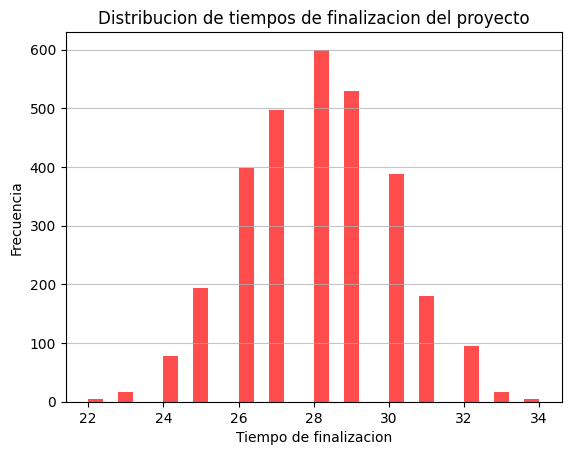

In [43]:
plt.hist(contadoresConstruccion['total'], bins=30, color='red', alpha=0.7)
plt.title('Distribucion de tiempos de finalizacion del proyecto')
plt.xlabel('Tiempo de finalizacion')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

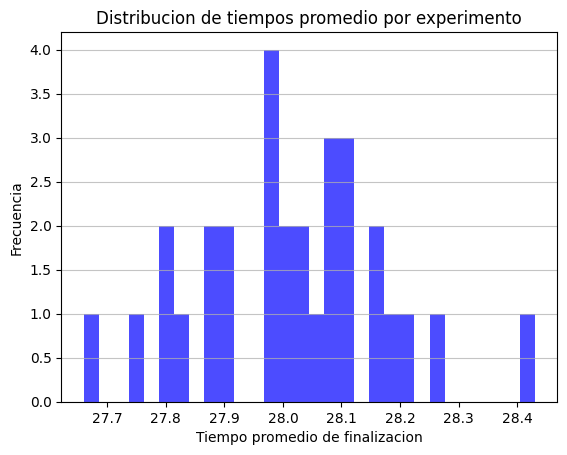

In [44]:
plt.hist(contadoresConstruccion['promedioExperimento'], bins=30, color='blue', alpha=0.7)
plt.title('Distribucion de tiempos promedio por experimento')
plt.xlabel('Tiempo promedio de finalizacion')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)